In [1]:
import numpy as np 
np.set_printoptions(threshold=np.nan) 
import pandas as pd
import warnings
import sklearn
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
warnings.filterwarnings('ignore')



Hello World
[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]


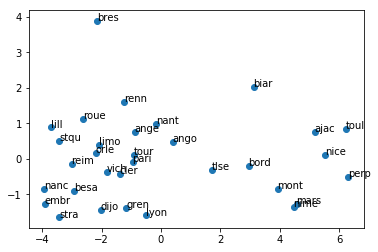

Hello World
[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
   0.50242093]]


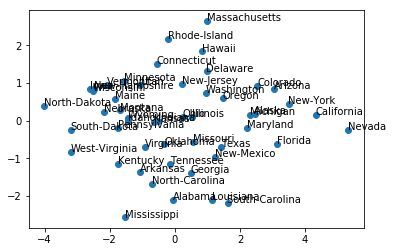

[PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 array([[ -5.03866430e-02,  -2.11738312e+00],
        [  2.44609952e+00,   1.68213679e-01],
        [  3.04473945e+00,   8.53523426e-01],
        [ -1.06511538e+00,  -1.35910001e+00],
        [  4.32729524e+00,   1.44641110e-01],
        [  2.53476822e+00,   9.25902176e-01],
        [ -5.46825358e-01,   1.51647081e+00],
        [  9.74373602e-01,   1.30990789e+00],
        [  3.14334620e+00,  -6.10047943e-01],
        [  4.95386484e-01,  -1.39480696e+00],
        [  8.31488203e-01,   1.84243558e+00],
        [ -1.44699704e+00,  -8.08717290e-03],
        [  5.18109761e-01,   9.51871448e-02],
        [ -5.04970711e-01,   2.62976996e-05],
        [ -2.60777135e+00,   8.33126725e-01],
        [ -6.40504338e-01,  -2.83263339e-02],
        [ -1.74444113e+00,  -1.15827284e+00],
        [  1.13157549e+00,  -2.10442448e+00],
        [ -1.84485248e+00,   5.84661021e-01],
      

In [2]:
def pca_premier_exo(path='villes.csv', variance=0.7, print_mode=True):
    data = pd.read_csv(path, sep=';')
    X = data.ix[:, 1:len(data)-1].values
    labels = data.ix[:, 0].values
    scaler = StandardScaler()
    normalized = scaler.fit_transform(X)
    for x in range(len(data)):
        pca = PCA(n_components=x)
        pca.fit(normalized)
        if sum(pca.explained_variance_ratio_) > variance and x >1:
            print('Hello World')
            break
    print(pca.components_)
    X_pca = pca.fit_transform(normalized)
    if print_mode:
        plt.scatter(X_pca[:, 0], X_pca[:, 1])
        for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
            plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
        plt.show()
        plt.close()
    return [pca,X_pca]
        
        
pca_premier_exo()

pca_premier_exo(path='crime.csv')

In [3]:
def kmeans_premier_exo(path='villes.csv', print_mode=True):
    data = pd.read_csv(path, sep=';')
    X = data.ix[:, 1:len(data)-1].values
    labels = data.ix[:, 0].values
    scaler = StandardScaler()
    normalized = scaler.fit_transform(X)
    pca = PCA(n_components=len(X[0])-1)
    pca.fit(normalized)
    X_pca = pca.fit_transform(normalized)
    kmeansoutput = KMeans(n_clusters=3, random_state=0).fit(X_pca)
    if print_mode:
        plt.figure('3 Cluster K-Means')
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeansoutput.labels_)
        plt.title('3 Cluster K-Means')
        plt.show()
    return [kmeansoutput,X_pca]

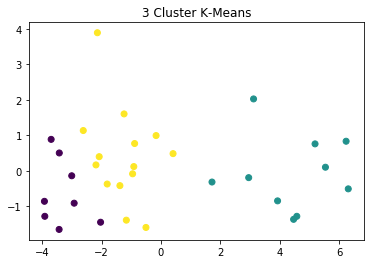

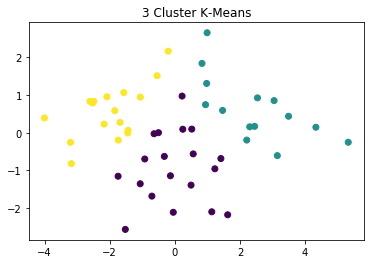

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=0, tol=0.0001, verbose=0),
 array([[ -5.03866430e-02,  -2.11738312e+00,   5.06737549e-01,
           2.53533382e-01,   5.03546990e-01,  -4.38020729e-01],
        [  2.44609952e+00,   1.68213679e-01,  -7.04391434e-02,
           1.17225334e+00,   1.48497546e+00,   1.51301170e+00],
        [  3.04473945e+00,   8.53523426e-01,  -1.76973694e+00,
          -1.17391684e-01,   2.83055760e-01,  -1.08130788e+00],
        [ -1.06511538e+00,  -1.35910001e+00,  -1.85236119e-02,
           2.17550132e-02,   2.29185725e-02,   3.89956291e-01],
        [  4.32729524e+00,   1.44641110e-01,   2.78958608e-01,
           2.53768363e-02,   5.85192438e-02,   3.80912964e-01],
        [  2.53476822e+00,   9.25902176e-01,  -1.16327185e+00,
           1.13745704e-01,  -1.70950079e-01,   3.34395619e-01],
        [ -5.46825358e-01,   1.51647081e+00,   7.9184

In [4]:
kmeans_premier_exo()
kmeans_premier_exo('crime.csv')

In [5]:
essai = 0
def agglo(path='villes.csv', print_mode=True, methode='ward'):
    global essai
    data = pd.read_csv(path, sep=';')
    X = data.ix[:, 1:len(data)-1].values
    labels = data.ix[:, 0].values
    scaler = StandardScaler()
    normalized = scaler.fit_transform(X)
    pca = PCA(n_components=len(X[0])-1)
    pca.fit(normalized)
    X_pca = pca.fit_transform(normalized)
    model = AgglomerativeClustering(linkage=methode,
                                    n_clusters=3)
    model.fit(X_pca)
    if print_mode:
        plt.figure('3 Cluster K-Means')
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_)
        plt.title('3 Cluster K-Means, methode:' + methode)
        plt.show()
    return [model,X_pca]

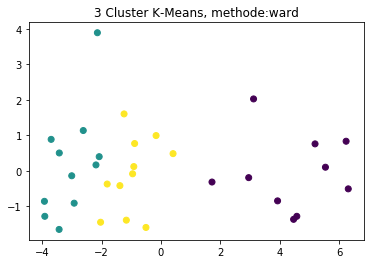

In [6]:
algo = agglo('villes.csv', methode='ward')
### agglo('villes.csv', methode='average')
### agglo('villes.csv', methode='complete')

In [7]:
def dunn(c, distances):
    """
    Dunn index for cluster validation (the bigger, the better)
    """
    unique_cluster_distances = np.unique(min_cluster_distances(c, distances))
    max_diameter = max(diameter(c, distances))

    if np.size(unique_cluster_distances) > 1:
        return unique_cluster_distances[1] / max_diameter
    else:
        return unique_cluster_distances[0] / max_diameter

def min_cluster_distances(c, distances):
    """Calculates the distances between the two nearest points of each cluster"""
    min_distances = np.zeros((max(c) + 1, max(c) + 1))
    for i in np.arange(0, len(c)):
        if c[i] == -1: continue
        for ii in np.arange(i + 1, len(c)):
            if c[ii] == -1: continue
            if c[i] != c[ii] and distances[i, ii] > min_distances[c[i], c[ii]]:
                min_distances[c[i], c[ii]] = min_distances[c[ii], c[i]] = distances[i, ii]
    return min_distances

def diameter(c, distances):
    """Calculates cluster diameters (the distance between the two farthest data points in a cluster)"""
    diameters = np.zeros(max(c) + 1)
    for i in np.arange(0, len(c)):
        if c[i] == -1: continue
        for ii in np.arange(i + 1, len(c)):
            if c[ii] == -1: continue
            if c[i] != -1 or c[ii] != -1 and c[i] == c[ii] and distances[i, ii] > diameters[c[i]]:
                diameters[c[i]] = distances[i, ii]
    return diameters 

In [8]:

paths = ['villes.csv', 'crime.csv']
methodes = ['ward', 'complete', 'average']

for path in paths:
    print("")
    print('')
    print('')
    print('')
    
    print(path)
    print('')
    clustering = kmeans_premier_exo(path=path, print_mode=False)
    distance = sklearn.metrics.pairwise.pairwise_distances(clustering[1])
    print('dunn kmeans')
    print(dunn(clustering[0].fit_predict(clustering[1]),distance))
    print('')
    print('silhouette kmeans')
    print(metrics.silhouette_score(clustering[1], clustering[0].fit_predict(clustering[1]),metric='euclidean'))
    print('')
    for methode in methodes:
        clustering = agglo(path=path, methode=methode, print_mode=False)
        distance = sklearn.metrics.pairwise.pairwise_distances(clustering[1])
        print('dunn agglo ' + methode)
        print(dunn(clustering[0].fit_predict(clustering[1]),distance))
        print('')
        print('silhouette agglo ' + methode)
        print(metrics.silhouette_score(clustering[1], clustering[0].fit_predict(clustering[1]),metric='euclidean'))


    





villes.csv

dunn kmeans
1.61252372446

silhouette kmeans
0.388153328517

dunn agglo ward
1.61936575143

silhouette agglo ward
0.368136829021
dunn agglo complete
1.33803413854

silhouette agglo complete
0.495721454165
dunn agglo average
1.33803413854

silhouette agglo average
0.495721454165




crime.csv

dunn kmeans
2.49321962468

silhouette kmeans
0.269985234352

dunn agglo ward
2.49321962468

silhouette agglo ward
0.234395473038
dunn agglo complete
1.97048346905

silhouette agglo complete
0.298719650292
dunn agglo average
1.93787814947

silhouette agglo average
0.325129064046


In [9]:
from sklearn import metrics


In [10]:
import pandas
pandas.DataFrame(distance)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,4.171727,4.918175,1.688442,5.025285,4.450242,3.699235,3.821442,4.163576,1.116698,...,3.995823,1.297623,2.351786,3.520342,3.881058,2.030545,3.773427,3.496793,4.087885,2.959156
1,4.171727,0.000000,3.681565,4.403013,2.879806,2.651019,4.196676,3.488932,3.390096,3.447387,...,6.233234,3.754021,2.847715,4.401431,5.332400,4.276727,2.874898,6.220178,5.730390,4.429732
2,4.918175,3.681565,0.000000,5.206247,2.924638,1.702020,4.537279,2.581894,2.164120,4.092020,...,6.804405,4.662233,3.066379,4.416902,5.358064,4.703248,2.856703,6.965584,5.872362,4.944881
3,1.688442,4.403013,5.206247,0.000000,5.606174,4.420405,3.111254,3.518583,4.599248,1.649275,...,2.566175,1.206178,2.852518,2.419433,2.677159,0.907282,3.207098,2.271490,2.713538,1.588721
4,5.025285,2.879806,2.924638,5.606174,0.000000,2.442576,5.134659,3.752851,2.388770,4.153203,...,7.608588,4.672150,3.287652,5.538716,6.552402,5.372036,3.813995,7.579083,6.954606,5.834520
5,4.450242,2.651019,1.702020,4.420405,2.442576,0.000000,3.765484,1.960131,1.925530,3.440327,...,5.985799,3.870266,2.655050,3.648834,4.710278,4.005727,1.664060,6.226896,5.166555,4.114937
6,3.699235,4.196676,4.537279,3.111254,5.134659,3.765484,0.000000,2.103188,4.839274,3.154046,...,3.526538,2.755710,3.243532,1.688245,2.120083,2.544238,2.893743,3.571482,2.558229,2.298296
7,3.821442,3.488932,2.581894,3.518583,3.752851,1.960131,2.103188,0.000000,3.223842,2.911110,...,4.683606,3.031479,2.322938,2.153035,3.128460,2.841471,1.607708,4.832744,3.576221,2.902902
8,4.163576,3.390096,2.164120,4.599248,2.388770,1.925530,4.839274,3.223842,0.000000,3.355037,...,6.480211,4.043248,2.948167,4.621896,5.562010,4.444231,2.901796,6.676633,6.039358,4.812270
9,1.116698,3.447387,4.092020,1.649275,4.153203,3.440327,3.154046,2.911110,3.355037,0.000000,...,4.052255,0.839223,1.518171,2.965097,3.603462,1.691799,2.817553,3.741044,3.834047,2.614031


In [11]:
essai

0